In [6]:
import numpy as np
import matplotlib.pyplot as plt
import psyplot.project as psy
import iconarray
# from toolbox import add_grid_info2, ind_from_latlon

In [7]:
# grid file
f_g = '/store/s83/swester/vert_coord_files/icon-1-alps/alps_DOM01.nc'

# output file
f_o = '/store/s83/swester/vert_coord_files/icon-1-alps/const_sleve.nc'

In [8]:
ds_grid = psy.open_dataset(f_g).squeeze()
ds_vars = psy.open_dataset(f_o).squeeze()

In [15]:
ds = iconarray.combine_grid_information(f_o, f_g)
ds

<xarray.Dataset>
Dimensions:      (cell: 417776, vertices: 3, height: 81, bnds: 2)
Coordinates:
    clon         (cell) float32 0.09429 0.09416 0.09426 ... 0.2323 0.2323 0.2322
    clon_bnds    (cell, vertices) float32 0.09441 0.0941 ... 0.2321 0.2321
    clat         (cell) float32 0.7776 0.7773 0.7774 ... 0.8323 0.8322 0.8321
    clat_bnds    (cell, vertices) float32 0.7777 0.7776 0.7775 ... 0.8322 0.832
  * height       (height) float64 1.0 2.0 3.0 4.0 5.0 ... 78.0 79.0 80.0 81.0
    height_bnds  (height, bnds) float64 ...
Dimensions without coordinates: cell, vertices, bnds
Data variables:
    HSURF        (cell) float64 ...
    HHL          (height, cell) float64 ...
Attributes:
    CDI:                  Climate Data Interface version 1.8.4 (http://mpimet...
    Conventions:          CF-1.6
    number_of_grid_used:  1
    uuidOfHGrid:          e6e15392-81d8-3713-a7bb-5589891d2b40
    uuidOfVGrid:          5c4f6908-7d2f-ed97-6aa6-1625877c2c60
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               git@gitlab.dkrz.de:icon/icon-nwp.git@147ed11ca55c4e...
    history:              /scratch/snx3000/swester/icon-nwp/cpu/bin/icon at 2...
    references:           see MPIM/DWD publications
    comment:              Stephanie Westerhuis, MCH (swester) on nid03508 (Li...

In [18]:
ds_grid.neighbor_cell_index

<xarray.DataArray 'neighbor_cell_index' (nv: 3, cell: 417776)>
[1253328 values with dtype=int32]
Coordinates:
    clon           (cell) float64 ...
    clat           (cell) float64 ...
    clon_vertices  (cell, nv) float64 ...
    clat_vertices  (cell, nv) float64 ...
Dimensions without coordinates: nv, cell

psyplot.project.Project([    arr0: 1-dim DataArray of HSURF, with (cell)=(417776,), ])

/scratch/swester/miniconda3/envs/vert_coord/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://www.ngdc.noaa.gov/mgg/shorelines/data/gshhs/latest/gshhg-shp-2.3.7.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


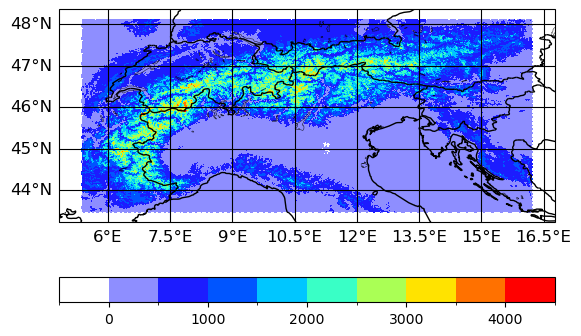

In [11]:
psy.plot.mapplot(ds, name='HSURF')

psyplot.project.Project([    arr1: 1-dim DataArray of HSURF, with (cell)=(417776,), ])

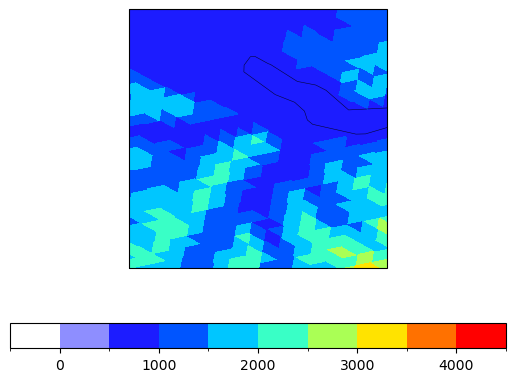

In [12]:
psy.plot.mapplot(ds, name='HSURF', map_extent=[7.5,7.8,46.5,46.8], xgrid=False, ygrid=False)

In [13]:
lat, lon = 46.77884, 7.63525 # Steffisburg
lats = np.rad2deg(ds.clat.values)
lons = np.rad2deg(ds.clon.values)
ind = iconarray.ind_from_latlon(lats, lons, lat, lon)
print(f'Location of Steffisburg: {ind}')

Location of Steffisburg: 304032


psyplot.project.Project([    arr3: 1-dim DataArray of HSURF2, with (cell)=(417776,), ])

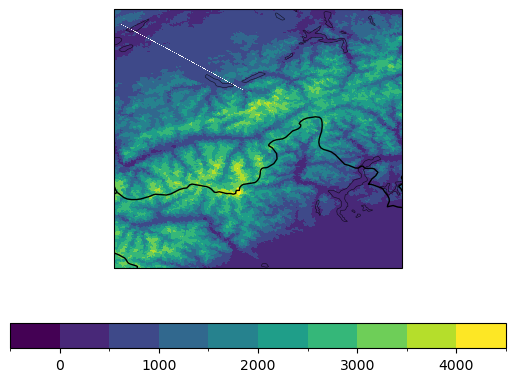

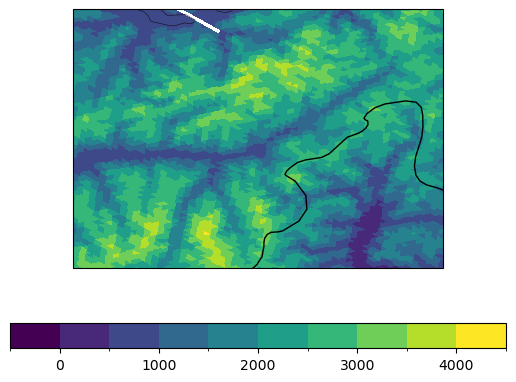

In [19]:
# find line
###########

# number of grid cells
N = ds.HSURF.size

# initialise mask
mask = np.ones(N)

# mark line with nan
mask[ind] = np.nan

# triangle collection index
index_pattern_se = [2,1] * 35
index_list_se = np.empty(70, dtype=int)
index_pattern_nw = [1,2] * 15
index_list_nw = np.empty(30, dtype=int)

# extend in south-east direction
new_index = ind
for e, i in enumerate(index_pattern_se):
    neighbors = ds_grid.neighbor_cell_index.isel(cell=new_index).values
    new_index = neighbors[i] - 1
    index_list_se[e] = new_index
    mask[new_index] = np.nan

# extend in northwest direction
new_index = ind
for e,i in enumerate(index_pattern_nw):
    neighbors = ds_grid.neighbor_cell_index.isel(cell=new_index).values
    new_index = neighbors[i] - 1
    index_list_nw[e] = new_index
    mask[new_index] = np.nan

# create new HSURF with masked line
ds = ds.assign(HSURF2=ds['HSURF']*mask)
ds.HSURF2.encoding["coordinates"] = 'clat clon'

#ds.HSURF2


psyplot.project.Project([    arr7: 1-dim DataArray of HSURF2, with (cell)=(417776,), ])

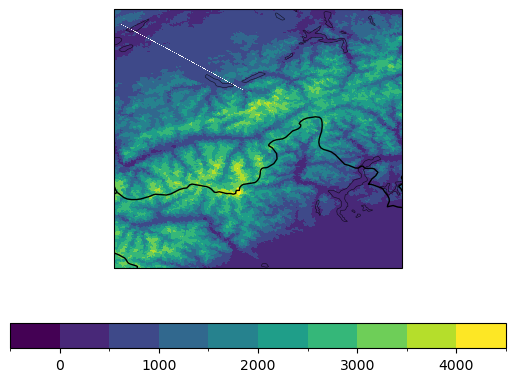

In [23]:

# plot new HSURF
psy.plot.mapplot(ds, name='HSURF2',map_extent=[7.0,9.0,45.4,47.2], xgrid=False, ygrid=False, cmap='viridis')

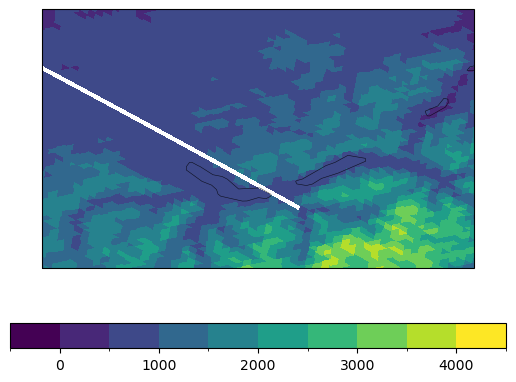

In [22]:
psy.plot.mapplot(ds, name='HSURF2',map_extent=[7.3,8.3,46.5,47.1], xgrid=False, ygrid=False, cmap='viridis')
plt.savefig('/scratch/swester/vert_coord/example_plots/slice_a_b')

In [41]:
ind_line = np.append(np.append(index_list_nw, np.array(ind)), index_list_se)

In [ ]:

# plot new HSURF
psy.plot.mapplot(ds, name='HSURF2',map_extent=[7.0,9.0,45.4,47.2], xgrid=False, ygrid=False, cmap='viridis')
psy.plot.mapplot(ds, name='HSURF2',map_extent=[7.3,8.3,46.5,47.1], xgrid=False, ygrid=False, cmap='viridis')

In [55]:
hsurf = ds.HSURF.values
hhl = ds.HHL.values
oro = hsurf[ind_line]
vcoords = hhl[:,ind_line]
vcoords.shape

(81, 101)

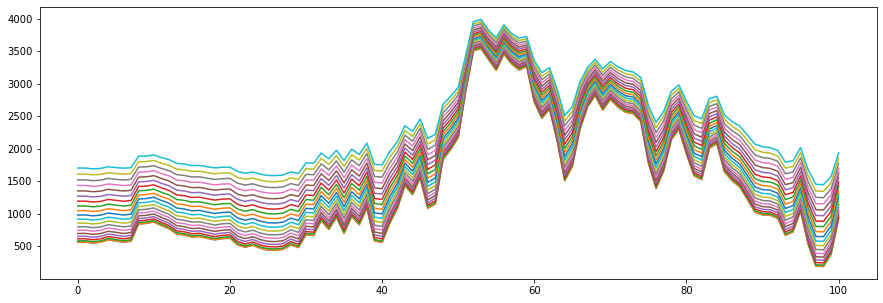

In [60]:
fig, ax = plt.subplots(figsize = (15,5))
plt.plot(oro)
for i in range(1,20):
    plt.plot(vcoords[-i,:])